In [111]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

# Load your initial data - Ensure your DataFrame 'df' includes 'Country', 'New Category', 'Brand Name', and 'MAT ValueShare'
df = pd.read_excel('HORIZON_i.xlsx')

In [112]:
unique_values = df['Category'].unique()
print(unique_values)

[nan 'Hair Care' 'Skin Care']


In [113]:
def weighted_mean(x, weights):
    """Compute weighted mean, ensuring all data is numeric and handling NaNs."""
    # Ensure numeric types and handle NaNs in both data and weights
    x = pd.to_numeric(x, errors='coerce')
    weights = pd.to_numeric(weights, errors='coerce')
    
    # Drop NaNs from both x and weights
    mask = ~np.isnan(x) & ~np.isnan(weights)
    if not np.any(mask):
        return np.nan  # Return NaN if all weights or values are NaN
    return np.average(x[mask], weights=weights[mask])

In [114]:
# List of columns to perform calculations on, preserving original order excluding group and weight columns
#calc_columns = [col for col in df.columns if col not in ['Country', 'New Category', 'Manufacturer_recoded', 'MAT Value']]


calc_columns=[
'MAT ValueShare',
'MAT-1 ValueShare',
'MAT AveragePrice',
'MAT-1 AveragePrice',
'MAT AveragePriceIndex',
'MAT-1 AveragePriceIndex',
'MAT Q4 2023 (MAT) Attractive Pack',
'MAT Q4 2022 (MAT-1) Attractive Pack',
'MAT Q4 2023 (MAT) Better Quality Index',
'MAT Q4 2022 (MAT-1) Better Quality Index',
'MAT Q4 2023 (MAT) Brand Power Score',
'MAT Q4 2022 (MAT-1) Brand Power Score',
'MAT Q4 2023 (MAT) Different Index',
'MAT Q4 2022 (MAT-1) Different Index',
'MAT Q4 2023 (MAT) Meaningful Index',
'MAT Q4 2022 (MAT-1) Meaningful Index',
'MAT Q4 2023 (MAT) Perceived Price Index',
'MAT Q4 2022 (MAT-1) Perceived Price Index',
'MAT Q4 2023 (MAT) Perceived Worth Index',
'MAT Q4 2022 (MAT-1) Perceived Worth Index',
'MAT Q4 2023 (MAT) Premium Index',
'MAT Q4 2022 (MAT-1) Premium Index',
'MAT Q4 2023 (MAT) Recycled Packaging',
'MAT Q4 2022 (MAT-1) Recycled Packaging',
'MAT Q4 2023 (MAT) SLP - Absolute',
'MAT Q4 2022 (MAT-1) SLP - Absolute',
'MAT Q4 2023 (MAT) SLP - Profile',
'MAT Q4 2022 (MAT-1) SLP - Profile',
'MAT Q4 2023 (MAT) Salient Index',
'MAT Q4 2022 (MAT-1) Salient Index',
'MAT Q4 2023 (MAT) TBCA',
'MAT Q4 2022 (MAT-1) TBCA',
'TDP Share',
'YA TDP Share',
'SPPD TY',
'SPPD YA',
'Fair Share TY',
'Fair Share YA',
'MAT Penetration',
'MAT-1 Penetration',
'MAT Relative Penetration',
'MAT-1 Relative Penetration',
'MAT Repeat Rate',
'MAT-1 Repeat Rate',
'Overall Score Win %',
'Overall Score Parity %',
'Overall Score Loss %',
'SOM % MAT',
'SOM % MAT-1',
'SOS % MAT',
'SOS % MAT-1',
'SOS/SOM MAT',
'SOS/SOM MAT-1',
"% INCREMENTALITY (MAT Q2'23) ",
"% INCREMENTALITY (MAT Q2'22) ",
"UL INDEX INNOVATION VALUE SALES (MAT Q2'23) ",
"UL INDEX INNOVATION VALUE SALES (MAT Q2'22) ",
'Innovation Fair Share Index MAT',
'Innovation Fair Share Index MAT-1',
'MAT Weighted Brand Average Sentiment',
'MAT-1 Weighted Brand Average Sentiment',
'MAT Weighted Brand Average Rating',
'MAT-1 Weighted Brand Average Rating',
'Sum of Value Sales MAT Economy V Share',
'Sum of Value Sales MAT-1 Economy V Share',
'Sum of Value Sales MAT Lower Mass V Share',
'Sum of Value Sales MAT-1 Lower Mass V Share',
'Sum of Value Sales MAT Upper Mass V Share',
'Sum of Value Sales MAT-1 Upper Mass V Share',
'Sum of Value Sales MAT Premium V Share',
'Sum of Value Sales MAT-1 Premium V Share',
'Sum of Value Sales MAT Super Premium V Share',
'Sum of Value Sales MAT-1 Super Premium V Share',
'Sum of Value Sales MAT Masstige 200+ V Share',
'Sum of Value Sales MAT-1 Masstige 200+ V Share',
'NPD effect (%)',
'Delist effect (%)',
'Price Effect (%)',
'Mix Effect (%)',
'Channel effect (%)',
'Interaction effect (%)']

# Group by 'Country' and 'New Category'
grouped = df.groupby(['Country', 'Category','Manufacturer_recoded'])


# Calculate weighted means preserving column order
weighted_means = {col: grouped.apply(lambda g, c=col: weighted_mean(g[c], g['MAT Value'])) for col in calc_columns}

# Convert dictionary to DataFrame for better readability
weighted_stats_df = pd.DataFrame(weighted_means)

#weighted_stats_df.to_excel("Unilever Weighted Stats.xlsx")



In [115]:
# Create a list to store the BPS columns and original columns
columns = []

# List of columns to exclude
exclude_columns = [
    'NPD effect (%)',
    'Delist effect (%)',
    'Price Effect (%)',
    'Mix Effect (%)',
    'Channel effect (%)',
    'Interaction effect (%)'
]

# Iterate over the columns in pairs
for i in range(0, len(weighted_stats_df.columns), 2):
    mat_col = weighted_stats_df.columns[i]
    mat_1_col = weighted_stats_df.columns[i+1]

    # Skip this pair if either column is in the exclude list
    if mat_col in exclude_columns or mat_1_col in exclude_columns:
        continue

    # Compute the BPS and store it in a new column
    bps_col = mat_col + '_BPS'
    weighted_stats_df[bps_col] = ((weighted_stats_df[mat_col] - weighted_stats_df[mat_1_col])*100)

    # Add the original columns and the BPS column to the list
    columns.extend([mat_col, mat_1_col, bps_col])

# Select only the BPS columns and original columns
df = weighted_stats_df.round(2)[columns]

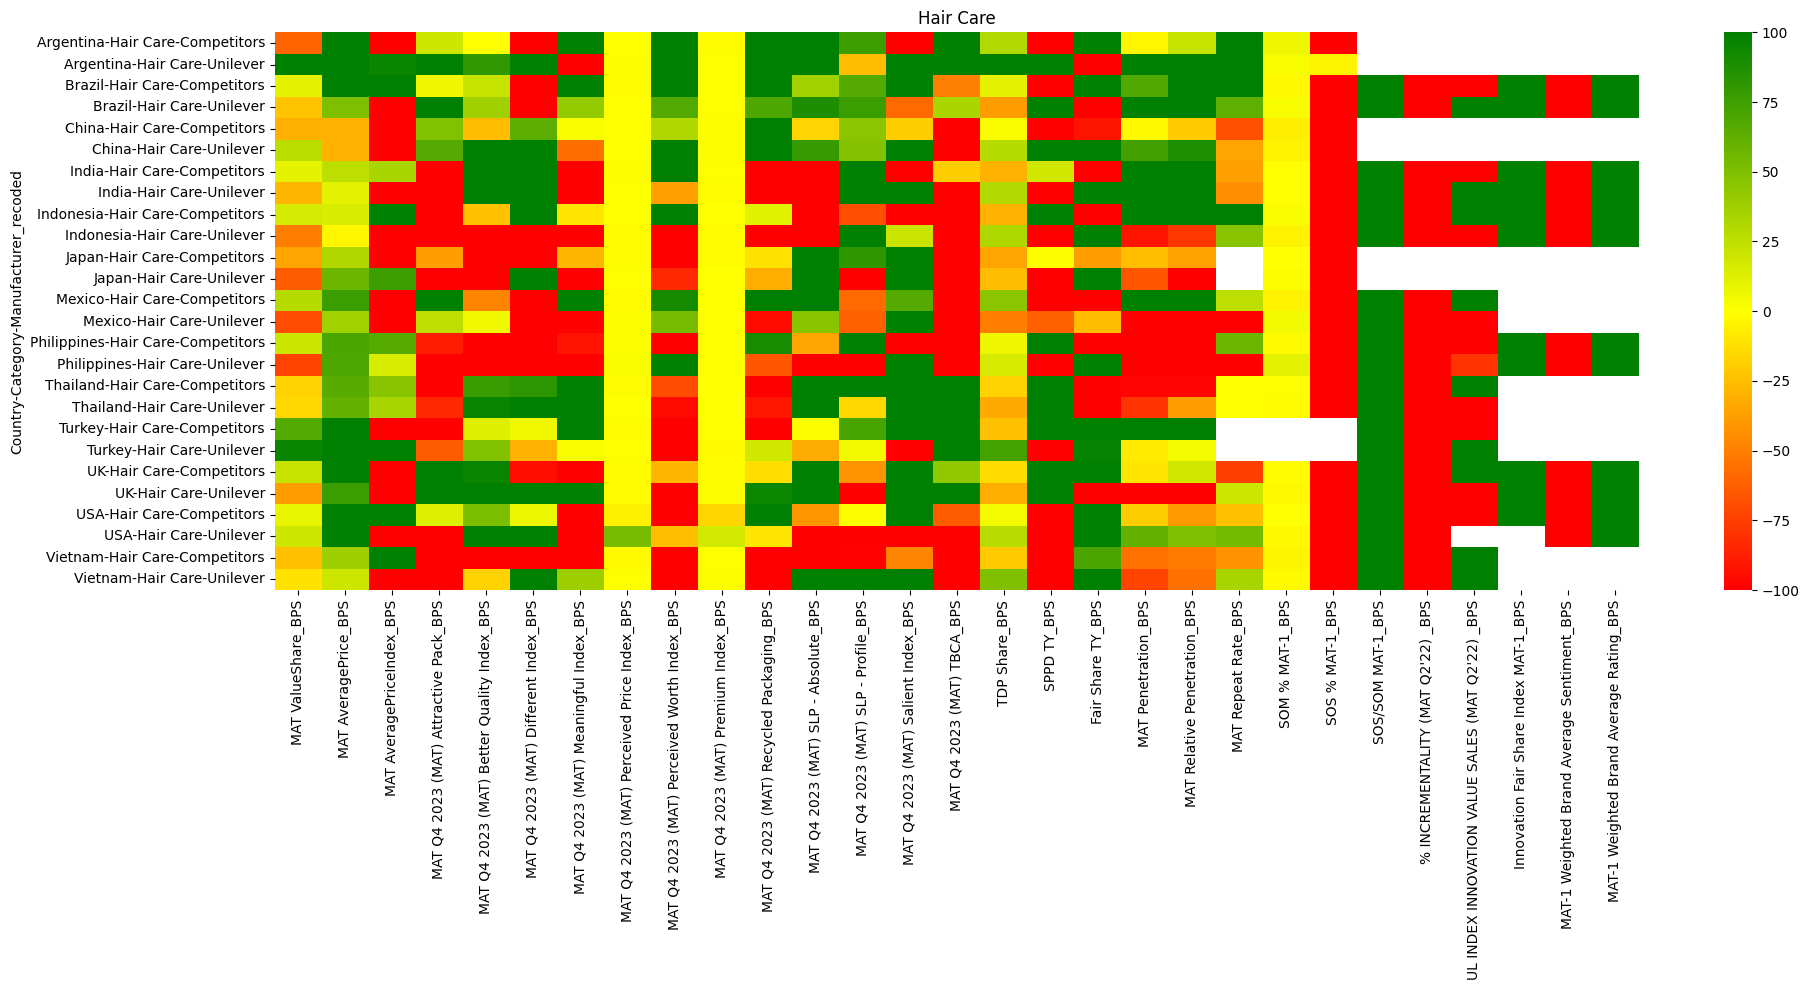

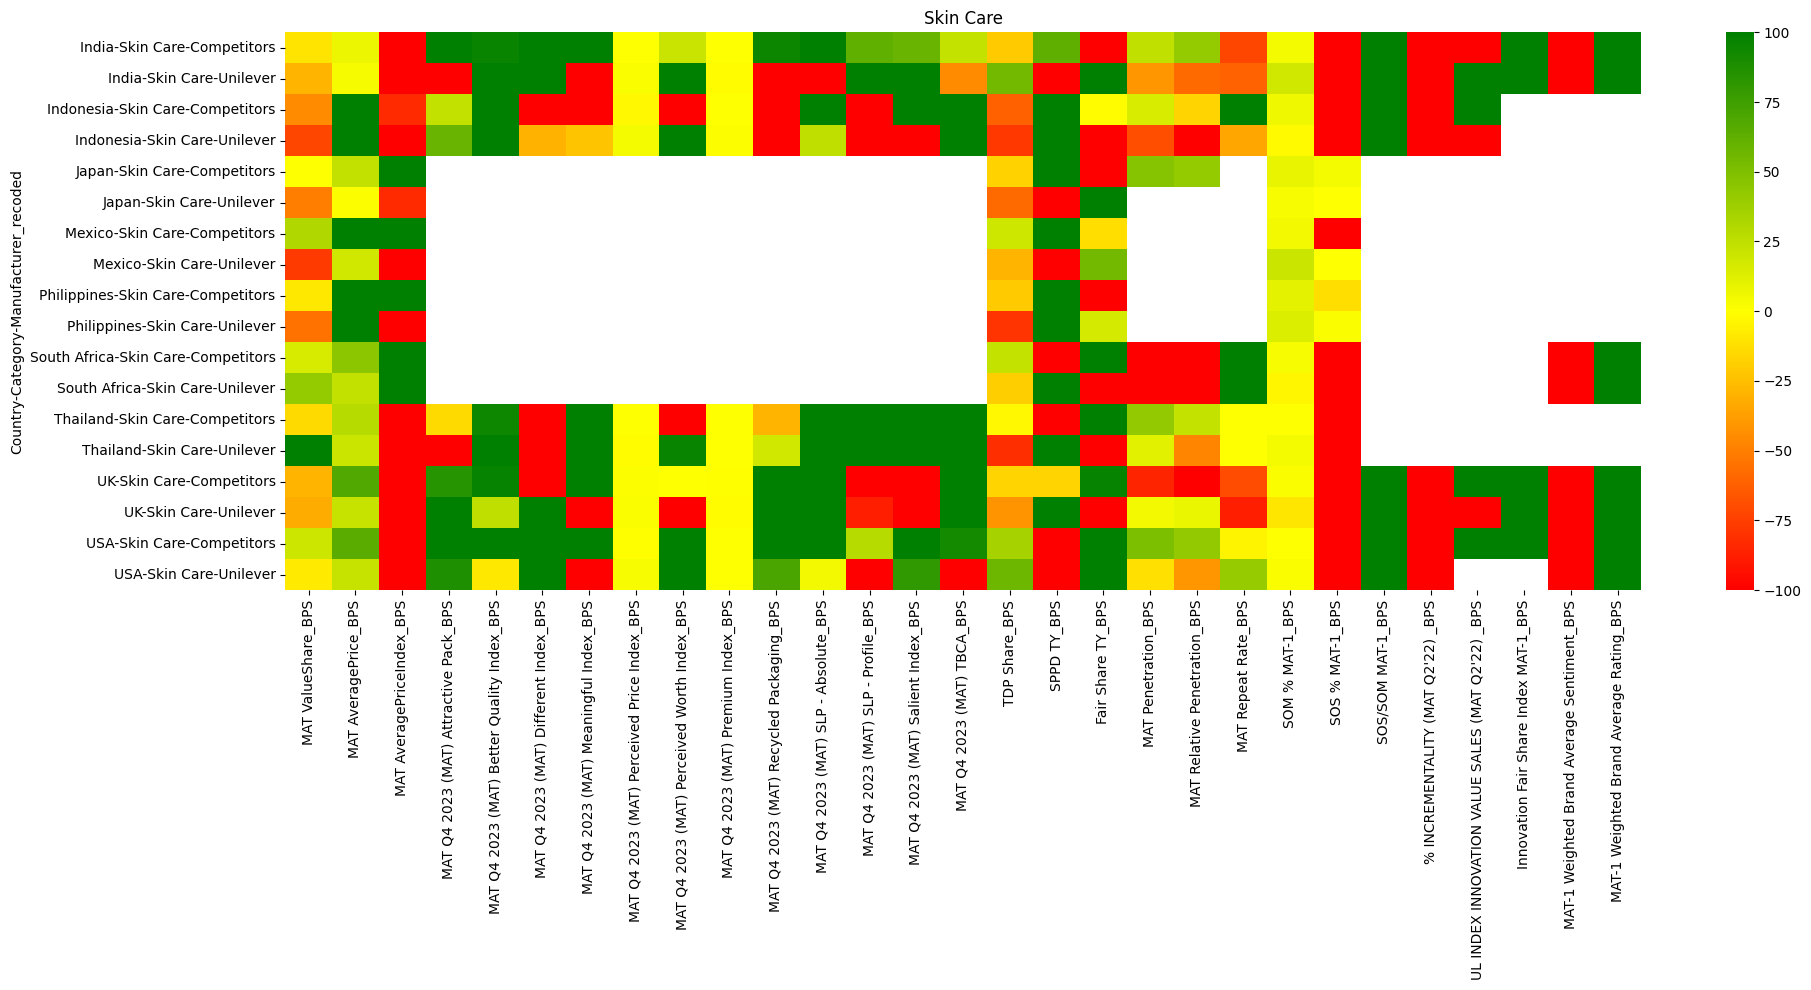

In [116]:
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

# Assuming weighted_stats_df is defined and is a pandas DataFrame
# weighted_stats_df = pd.DataFrame()

# Select only the 'BPS' columns that do not include 'V share'
bps_columns = [col for col in weighted_stats_df.columns if 'BPS' in col and 'V Share' not in col and 'Score' not in col]

# Define the colors for the colormap
colors = ['red', 'yellow', 'green']  # Changed 'amber' to 'yellow'

# Create the colormap
cmap = mcolors.LinearSegmentedColormap.from_list('mycmap', colors)

# Group the DataFrame by the 'Category' column
grouped = weighted_stats_df[bps_columns].groupby('Category')

# Create a separate figure and heatmap for each group
for name, group in grouped:
    fig, ax = plt.subplots(figsize=(20, 10))  # Create a new figure for each group
    sns.heatmap(group, cmap=cmap, center=0, vmin=-100, vmax=100, ax=ax)  # No need to transpose the DataFrame
    ax.set_title(name)  # Set the title of the plot to the name of the group
    plt.tight_layout()
    plt.show()

In [117]:
grouped = weighted_stats_df.groupby(['Country', 'Category','Manufacturer_recoded'])

In [118]:
#weighted_stats_df.to_excel("Unilever Weighted Stats.xlsx")
df.to_excel("Unilever Weighted Stats.xlsx")
